<a href="https://colab.research.google.com/github/KIMMOOKYONG/COLAB-NOTENOOK/blob/main/TA_LIB_RSI%EA%B3%84%EC%82%B0%EB%B0%8F%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
!pip install pandas_ta

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

In [57]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import talib
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [18]:
# 주가 데이터 다운로드 및 이동평균 칼럼 초기화
TICKER = "AAPL"
START = "2020-01-01"

data = yf.download(TICKER, start=START)
print(data.head())
data.to_csv(f"{TICKER}.csv")

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.785919  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  73.068573  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  73.650795  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  73.304405  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  74.483604  132079200


In [34]:
# read_csv() 함수로 파일을 읽어들이면 인덱스로 일련번호를 생성한다.
df = pd.read_csv(f"{TICKER}.csv")[["Date","Open","High","Low","Adj Close"]]
df.rename(columns={"Adj Close":"Close"}, inplace=True)
df.sort_values(by="Date", inplace=True)
df["Date"] = pd.to_datetime(df["Date"])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    625 non-null    datetime64[ns]
 1   Open    625 non-null    float64       
 2   High    625 non-null    float64       
 3   Low     625 non-null    float64       
 4   Close   625 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.3 KB
None


,Date,Open,High,Low,Close
0,2020-01-02,74.059998,75.150002,73.797501,73.785919
1,2020-01-03,74.287498,75.144997,74.125000,73.068573
2,2020-01-06,73.447502,74.989998,73.187500,73.650795
3,2020-01-07,74.959999,75.224998,74.370003,73.304405
4,2020-01-08,74.290001,76.110001,74.290001,74.483604


In [35]:
help(ta.rsi)

Help on function rsi in module pandas_ta.momentum.rsi:

rsi(close, length=None, scalar=None, talib=None, drift=None, offset=None, **kwargs)
    Relative Strength Index (RSI)
    
    The Relative Strength Index is popular momentum oscillator used to measure the
    velocity as well as the magnitude of directional price movements.
    
    Sources:
        https://www.tradingview.com/wiki/Relative_Strength_Index_(RSI)
    
    Calculation:
        Default Inputs:
            length=14, scalar=100, drift=1
        ABS = Absolute Value
        RMA = Rolling Moving Average
    
        diff = close.diff(drift)
        positive = diff if diff > 0 else 0
        negative = diff if diff < 0 else 0
    
        pos_avg = RMA(positive, length)
        neg_avg = ABS(RMA(negative, length))
    
        RSI = scalar * pos_avg / (pos_avg + neg_avg)
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): It's period. Default: 14
        scalar (float): How much to magnify.

In [36]:
# df["RSI"] = ta.rsi(close=df["Close"], length=10)
# df["RSI"] = df.ta.rsi(length=10)
df.ta.rsi(length=10, append=True)
df

,Date,Open,High,Low,Close,RSI_10
0,2020-01-02,74.059998,75.150002,73.797501,73.785919,NaN
1,2020-01-03,74.287498,75.144997,74.125000,73.068573,NaN
2,2020-01-06,73.447502,74.989998,73.187500,73.650795,NaN
3,2020-01-07,74.959999,75.224998,74.370003,73.304405,NaN
4,2020-01-08,74.290001,76.110001,74.290001,74.483604,NaN
...,...,...,...,...,...,...
620,2022-06-17,130.070007,133.080002,129.809998,131.559998,34.318522
621,2022-06-21,133.419998,137.059998,133.320007,135.869995,42.895227
622,2022-06-22,134.789993,137.759995,133.910004,135.350006,42.157281
623,2022-06-23,136.820007,138.589996,135.630005,138.270004,47.764266


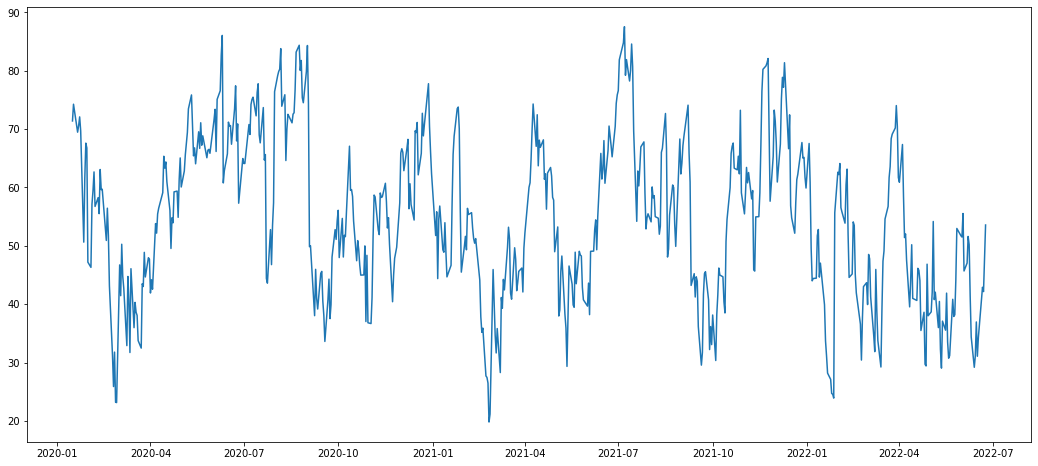

In [41]:
plt.figure(figsize=(18, 8))
plt.plot(df.Date, df.RSI_10)
plt.show()

In [51]:
# df["RSI"] = ta.rsi(close=df["Close"], length=10)
# df["RSI"] = df.ta.rsi(length=10)
df.ta.sma(length=100, append=True)
df

,Date,Open,High,Low,Close,RSI_10,SMA_10,SMA_100
0,2020-01-02,74.059998,75.150002,73.797501,73.785919,NaN,NaN,NaN
1,2020-01-03,74.287498,75.144997,74.125000,73.068573,NaN,NaN,NaN
2,2020-01-06,73.447502,74.989998,73.187500,73.650795,NaN,NaN,NaN
3,2020-01-07,74.959999,75.224998,74.370003,73.304405,NaN,NaN,NaN
4,2020-01-08,74.290001,76.110001,74.290001,74.483604,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
620,2022-06-17,130.070007,133.080002,129.809998,131.559998,34.318522,138.427,159.573309
621,2022-06-21,133.419998,137.059998,133.320007,135.869995,42.895227,137.400,159.339481
622,2022-06-22,134.789993,137.759995,133.910004,135.350006,42.157281,136.064,159.105140
623,2022-06-23,136.820007,138.589996,135.630005,138.270004,47.764266,135.095,158.789203


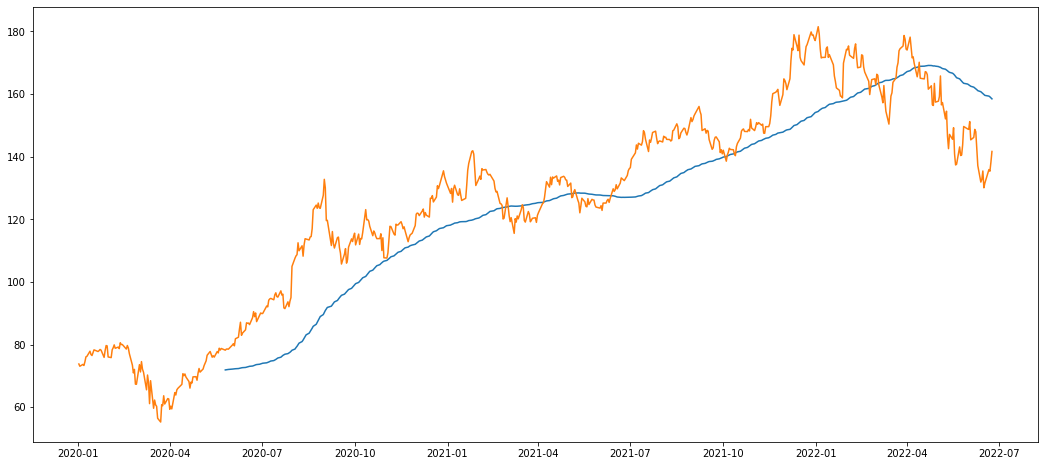

In [53]:
plt.figure(figsize=(18, 8))
plt.plot(df.Date, df.SMA_100)
plt.plot(df.Date, df.Close)
plt.show()

In [56]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [63]:
fig = go.Figure(data=[go.Candlestick(x=df.Date,
                                     open=df.Open,
                                     high=df.High,
                                     low=df.Low,
                                     close=df.Close)])
fig.show()

In [60]:
hadf = ta.ha(open_=df.High,
             close=df.Close,
             high=df.High,
             low=df.Low)
hadf

,HA_open,HA_high,HA_low,HA_close
0,74.467960,75.150002,73.797501,74.470856
1,74.469408,75.144997,74.125000,74.370892
2,74.420150,74.989998,73.187500,74.204573
3,74.312361,75.224998,74.312361,74.531101
4,74.421731,76.110001,74.290001,75.248402
...,...,...,...,...
620,133.268611,133.268611,129.809998,131.882500
621,132.575556,137.059998,132.575556,135.827499
622,134.201527,137.759995,133.910004,136.195000
623,135.198264,138.589996,135.198264,137.770000


In [62]:
fig = go.Figure(data=[go.Candlestick(x=df.Date,
                                     open=hadf.HA_open,
                                     high=hadf.HA_high,
                                     low=hadf.HA_low,
                                     close=hadf.HA_close)])
fig.show()

In [64]:
fig = go.Figure(data=[go.Candlestick(x=df.Date,
                                     open=hadf.HA_open,
                                     high=hadf.HA_high,
                                     low=hadf.HA_low,
                                     close=hadf.HA_close,
                                     increasing_line_color="red",
                                     decreasing_line_color="green")])
fig.show()